In [2]:
from ControlSystems.arm import VerticalDrivingArm

# インスタンス化。引数を与えなければ定数部分は初期値が入る
arm_system = VerticalDrivingArm()

# どういう状態を保持するか？
print(arm_system.state_names)

# 定数の値を確かめる
print(arm_system.constants)

# 定数の値を変更する
arm_system.J = 23.0

print(arm_system.constants)

['θ', 'ω']
{'J': 0.3, 'M': 1.5, 'l': 0.7, 'μ': 0.1}
{'J': 23.0, 'M': 1.5, 'l': 0.7, 'μ': 0.1}


In [3]:
from ControlSystems import SystemSimulator, SystemController, ControlSystem
import numpy as np
from numpy import float64

class ConstantController(SystemController):
    """定数入力だけを与えるコントローラ"""

    def __init__(self, system : ControlSystem, input : float64):
        self.system = system
        self.input = input

    def control(self, t, x):
        return self.input

arm_controller = ConstantController(arm_system, 10.0)

arm_simulator = SystemSimulator(
    controller=arm_controller,
    initial_state=np.array([np.pi / 2, 0.0]),
    time_series=np.arange(0, 40, 0.1),
)

results = arm_simulator.run()

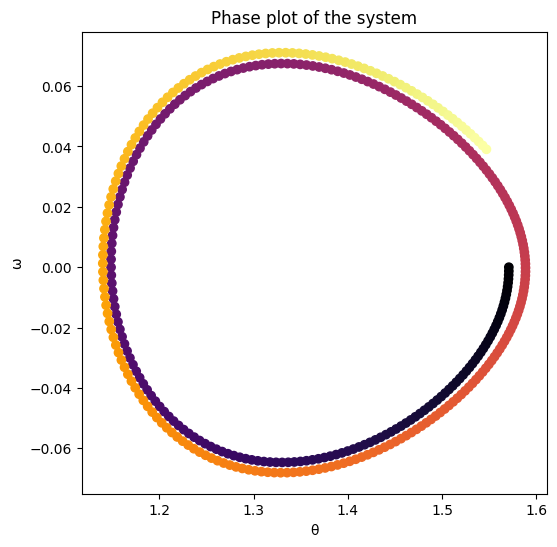

In [4]:

fig, _ = results.phase("θ", "ω")
fig.show(warn=False)
